In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load the data
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,[3,4]].values

In [5]:
# Dendrogram for Divisive Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Perform Divisive Clustering with 5 clusters
divisive_labels = divisive_clustering(X, 5)

# Ensure that the final divisive labels match the length of the original data
assert len(divisive_labels) == len(X), "Length mismatch between divisive labels and data"

# Assign the divisive cluster labels to the dataframe
df['Target_Divisive'] = divisive_labels

# Display the dataframe with divisive cluster labels
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Target_Divisive  
0                4.0  
1                4.0  
2                4

In [31]:
# Perform Divisive Clustering with 5 clusters
divisive_labels = divisive_clustering(X, 5)

In [32]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Usage
n_clusters_divisive = 5  # Set the desired number of divisive clusters
divisive_labels = divisive_clustering(X, n_clusters_divisive)
print(divisive_labels)


[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 0. 4. 0. 4. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


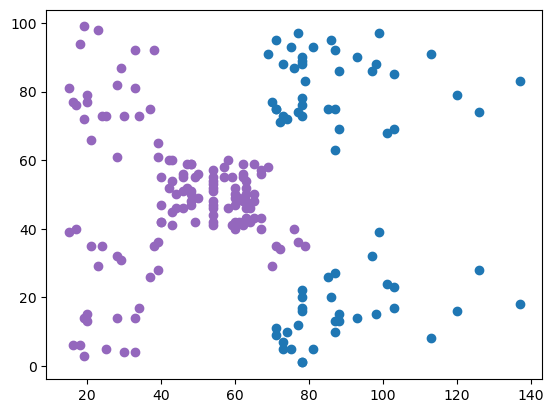

In [33]:
# Plot the Divisive Clustering results
plt.scatter(X[divisive_labels == 0, 0], X[divisive_labels == 0, 1], label='Cluster 1')
plt.scatter(X[divisive_labels == 1, 0], X[divisive_labels == 1, 1], label='Cluster 2')
plt.scatter(X[divisive_labels == 2, 0], X[divisive_labels == 2, 1], label='Cluster 3')
plt.scatter(X[divisive_labels == 3, 0], X[divisive_labels == 3, 1], label='Cluster 4')
plt.scatter(X[divisive_labels == 4, 0], X[divisive_labels == 4, 1], label='Cluster 5')

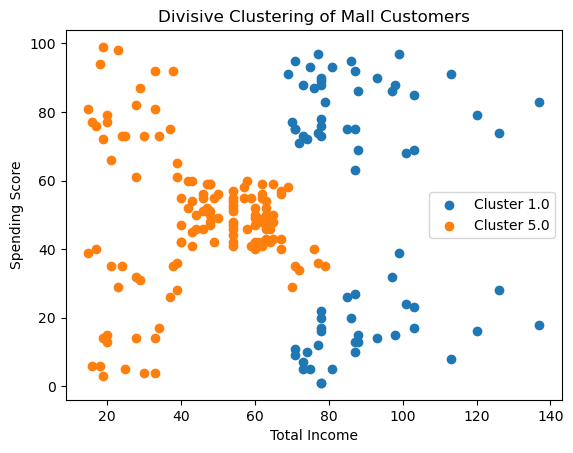

In [29]:
# Plot the Divisive Clustering results
unique_labels = np.unique(divisive_labels)

for label in unique_labels:
    plt.scatter(X[divisive_labels == label, 0], X[divisive_labels == label, 1], label=f'Cluster {label + 1}')

plt.title('Divisive Clustering of Mall Customers')
plt.xlabel('Total Income')
plt.ylabel('Spending Score')

# Specify labels for the legend
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]
plt.legend(labels=legend_labels)

plt.show()


In [34]:
# Display the dataframe with divisive cluster labels
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Target_Divisive  
0                4.0  
1                4.0  
2                4